MODEL 3

In [59]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

from keras.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy

from sklearn import metrics

In [60]:
data = pd.read_csv(r"data/data.csv")
print(data.shape)
print("Features count:",data.shape[1])
print("Raw count:",data.shape[0])

data.head()

(6420, 3)
Features count: 3
Raw count: 6420


,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [61]:
label_encoder = preprocessing.LabelEncoder()
  
data['label']= label_encoder.fit_transform(data['label'])

In [62]:
vocab_size = 5000
embedding_dim = 8
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 5000

In [63]:
sentences = []
labels = []

for item in range(data.shape[0]):
    sentences.append(data["tweet"][item])
    labels.append(data["label"][item])

In [64]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [65]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [66]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
modelagirlikilk = model.get_weights()

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 8)            40000     
                                                                 
 global_average_pooling1d_1   (None, 8)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                216       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 40,241
Trainable params: 40,241
Non-trainable params: 0
_________________________________________________________________


In [69]:
filepath = 'eachModel5/CheckPoint-{epoch:02d}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1,
    save_best_only=False,save_weights_only=False, mode='auto', save_freq='epoch')

In [70]:
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2,callbacks=[checkpoint])

Epoch 1/15

Epoch 1: saving model to eachModel5\CheckPoint-01.hdf5
157/157 - 2s - loss: 0.6793 - accuracy: 0.6708 - val_loss: 0.6430 - val_accuracy: 0.7613 - 2s/epoch - 12ms/step
Epoch 2/15

Epoch 2: saving model to eachModel5\CheckPoint-02.hdf5
157/157 - 1s - loss: 0.5559 - accuracy: 0.7960 - val_loss: 0.4590 - val_accuracy: 0.8514 - 1s/epoch - 8ms/step
Epoch 3/15

Epoch 3: saving model to eachModel5\CheckPoint-03.hdf5
157/157 - 1s - loss: 0.3811 - accuracy: 0.8632 - val_loss: 0.3300 - val_accuracy: 0.8761 - 1s/epoch - 8ms/step
Epoch 4/15

Epoch 4: saving model to eachModel5\CheckPoint-04.hdf5
157/157 - 1s - loss: 0.2772 - accuracy: 0.8976 - val_loss: 0.2682 - val_accuracy: 0.8937 - 1s/epoch - 8ms/step
Epoch 5/15

Epoch 5: saving model to eachModel5\CheckPoint-05.hdf5
157/157 - 1s - loss: 0.2185 - accuracy: 0.9190 - val_loss: 0.2351 - val_accuracy: 0.9092 - 1s/epoch - 8ms/step
Epoch 6/15

Epoch 6: saving model to eachModel5\CheckPoint-06.hdf5
157/157 - 1s - loss: 0.1822 - accuracy: 0.

In [71]:
# import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import callbacks, layers

class RandomCoordinates(object):
    def __init__(self, origin):
        self.origin_ = origin
        self.v0_ = normalize_weights(
            [np.random.normal(size=w.shape) for w in origin], origin
        )
        self.v1_ = normalize_weights(
            [np.random.normal(size=w.shape) for w in origin], origin
        )

    def __call__(self, a, b):
        return [
            a * w0 + b * w1 + wc
            for w0, w1, wc in zip(self.v0_, self.v1_, self.origin_)
        ]


def normalize_weights(weights, origin):
    return [
        w * np.linalg.norm(wc) / np.linalg.norm(w)
        for w, wc in zip(weights, origin)
    ]


class LossSurface(object):
    def __init__(self, model, inputs, outputs):
        self.model_ = model
        self.inputs_ = inputs
        self.outputs_ = outputs

    def compile(self, range, points, coords):
        a_grid = tf.linspace(-1.0, 1.0, num=points) ** 3 * range
        b_grid = tf.linspace(-1.0, 1.0, num=points) ** 3 * range
        loss_grid = np.empty([len(a_grid), len(b_grid)])
        for i, a in enumerate(a_grid):
            for j, b in enumerate(b_grid):
                self.model_.set_weights(coords(a, b))
                loss = self.model_.test_on_batch(
                    self.inputs_, self.outputs_, return_dict=True
                )["loss"]
                loss_grid[j, i] = loss
        self.model_.set_weights(coords.origin_)
        self.a_grid_ = a_grid
        self.b_grid_ = b_grid
        self.loss_grid_ = loss_grid

    def plot(self, range=1.0, points=24, levels=20, ax=None, **kwargs):
        xs = self.a_grid_
        ys = self.b_grid_
        zs = self.loss_grid_
        if ax is None:
            _, ax = plt.subplots(**kwargs)
            ax.set_title("The Loss Surface")
            ax.set_aspect("equal")
        # Set Levels
        min_loss = zs.min()
        max_loss = zs.max()
        levels = tf.exp(
            tf.linspace(
                tf.math.log(min_loss), tf.math.log(max_loss), num=levels
            )
        )
        # Create Contour Plot
        CS = ax.contour(
            xs,
            ys,
            zs,
            levels=levels,
            cmap="magma",
            linewidths=0.75,
        )
        ax.clabel(CS, inline=True, fontsize=8, fmt="%1.2f")
        return ax

<AxesSubplot:title={'center':'The Loss Surface'}>

<Figure size 600x400 with 0 Axes>

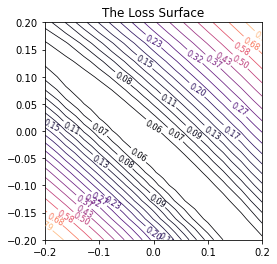

In [72]:
coords = RandomCoordinates(model.get_weights())
loss_surface = LossSurface(model, training_padded, training_labels)
loss_surface.compile(points=30, coords=coords,range=0.2)

# Look at loss surface
plt.figure(dpi=100)
loss_surface.plot()

In [73]:
# import landscapeviz
# landscapeviz.build_mesh(model, (training_padded, training_labels), grid_length=40, verbose=0)
# landscapeviz.plot_contour(key="sparse_categorical_crossentropy")
# landscapeviz.plot_3d(key="sparse_categorical_crossentropy")

TODO:
*Her bir model için tekrardan çalıştır.
*Her bir model için loss surface'ini kaydet.


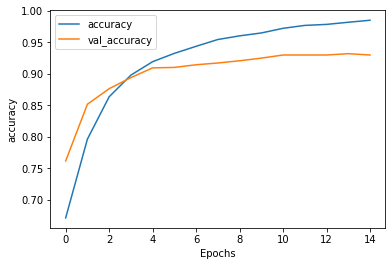

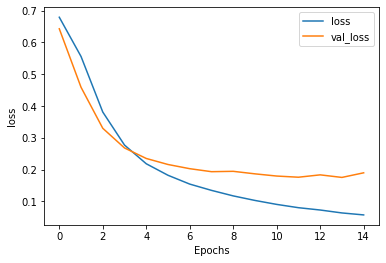

In [74]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

FARKLI BAŞLANGIÇ NOKTALARININ PCA İLE ÇİZİMİ

In [75]:
allPointWeightX1 = []
allPointWeightY1 = []

In [76]:
for j in range(5):
    for i in range(15):
        if i>=9:
            myModel = load_model('eachModel{}/CheckPoint-{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightX1.append(np.array(myModelweight[0:4]))
        else:
            myModel = load_model('eachModel{}/CheckPoint-0{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightX1.append(np.array(myModelweight[0:4]))
    
    for i in range(15):
        if i>=9:
            myModel = load_model('eachModel{}/CheckPoint-{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightY1.append(np.array(myModelweight[4]))
        else:
            myModel = load_model('eachModel{}/CheckPoint-0{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightY1.append(np.array(myModelweight[4]))

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\3969716254.py:10: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\3969716254.py:6: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [77]:
allPointWeightX1 = np.array(allPointWeightX1)
allPointWeightY1 = np.array(allPointWeightY1)

In [78]:
for i in range(75):
    allPointWeightX1[i][0] = allPointWeightX1[i][0].flatten()
    allPointWeightX1[i][1] = allPointWeightX1[i][1].flatten()
    allPointWeightX1[i][2] = allPointWeightX1[i][2].flatten()
    allPointWeightX1[i][3] = allPointWeightX1[i][3].flatten()

In [79]:
Xlist= []
for i in range(75):
    Xlist.append(np.hstack((allPointWeightX1[i][0],allPointWeightX1[i][1],allPointWeightX1[i][2],allPointWeightX1[i][3])))

In [80]:
Xlist = np.array(Xlist)

In [81]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(Xlist)

c:\Users\enes_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\enes_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 74 nearest neighbors...
[t-SNE] Indexed 75 samples in 0.007s...
[t-SNE] Computed neighbors for 75 samples in 0.117s...
[t-SNE] Computed conditional probabilities for sample 75 / 75
[t-SNE] Mean sigma: 26.050791
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.799702
[t-SNE] KL divergence after 1000 iterations: 0.056063


In [82]:
df = pd.DataFrame()
df["y"] = pd.DataFrame(allPointWeightY1)
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

[Text(0.5, 1.0, 'Farklı başlangıç noktaları için model adımları gösterimi')]

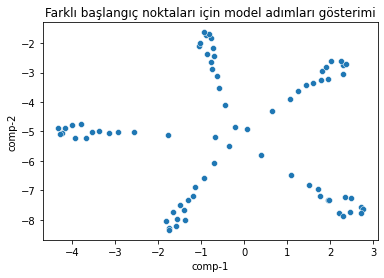

In [83]:
sns.scatterplot(x="comp-1", y="comp-2",
        data=df).set(title="Farklı başlangıç noktaları için model adımları gösterimi")

Modellerin PCA ile çizimi

In [84]:
df = px.data.iris()
X = Xlist

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [85]:

X = Xlist

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

MODEL GRADIENT HESABI ILE OPTİMUM YOLUN BULUNMASI

1. İLE 2. SON NOKTA ARASINDA

In [86]:
w0 = load_model('eachModel1/CheckPoint-15.hdf5')
firstWeight = w0.get_weights()
w0.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)

wT = load_model('eachModel2/CheckPoint-15.hdf5')
lastWeight = wT.get_weights()
wT.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)

tümNoktalarim = []
for i in range(6):
    tümNoktalarim.append([before + (after - before) * i / 5 for before, after in zip(firstWeight, lastWeight)])
tümNoktalarim.append(lastWeight)

ilkdogrunoktalari12 = tümNoktalarim.copy()

dogruUzerindekiIlkkLoss = []
for i, weights in enumerate(tümNoktalarim):
    model.set_weights(weights)
    print(f'Interpolated weights {i}:')
    loss,accuracy=model.evaluate(testing_padded, testing_labels)
    dogruUzerindekiIlkkLoss.append(loss)

# İterasyon başlangıç
for T in range(100):
    def step(X, y,i):
        # keep track of our gradients
        with tf.GradientTape() as tape:
            # make a prediction using the model and then calculate the
            # loss
            model.set_weights(tümNoktalarim[i])
            pred = model(X)
            tensor1 = tf.convert_to_tensor(y)
            tensor2 = tf.reshape(tensor1,[5000,1])
            loss = binary_crossentropy(tensor2, pred)
        # calculate the gradients using our tape and then update the
        # model weights
        grads = tape.gradient(loss, model.trainable_variables)
        return grads


    grads = []
    for i in range(1,6,1):
        grads.append(step(training_padded,training_labels,i))


    # Tan değerlerinin hesaplanması
    tanvalue = []
    for i in range(1,6,1):
        model.set_weights(tümNoktalarim[i-1])
        dotResult1 = model.evaluate(testing_padded, testing_labels)[0]

        model.set_weights(tümNoktalarim[i+1])
        dotResult2 = model.evaluate(testing_padded, testing_labels)[0]

        print(dotResult1,dotResult2)

        if (dotResult2 > dotResult1):
            tanvalue.append((np.array(tümNoktalarim[i+1]) - np.array(tümNoktalarim[i]))/5)
        else:
            tanvalue.append((np.array(tümNoktalarim[i]) - np.array(tümNoktalarim[i-1]))/5)

    gradList = []
    for i in range(5):
        first = np.array(grads[i][0].values)
        grad1 = [first[0:5000,:],np.array(grads[i][1]),np.array(grads[i][2]),np.array(grads[i][3]),np.array(grads[i][4])]
        grad1 = np.array(grad1)
        gradList.append(grad1)

    esasGradList = gradList.copy()
    gradList = np.array(gradList)


    for i in range(5):
        gradList[i][0] = gradList[i][0].flatten()
        gradList[i][1] = gradList[i][1].flatten()
        gradList[i][2] = gradList[i][2].flatten()
        gradList[i][3] = gradList[i][3].flatten()
        gradList[i][4] = gradList[i][4].flatten()


    tanlistem = []
    for i in range(5):
        tanget = [tanvalue[i][0],tanvalue[i][1],tanvalue[i][2],tanvalue[i][3],tanvalue[i][4]]
        tanget = np.array(tanget)
        tanlistem.append(tanget)

    esasTanList = tanlistem.copy()
    tanlistem = np.array(tanlistem)

    for i in range(5):
        tanlistem[i][0] = tanlistem[i][0].flatten()
        tanlistem[i][1] = tanlistem[i][1].flatten()
        tanlistem[i][2] = tanlistem[i][2].flatten()
        tanlistem[i][3] = tanlistem[i][3].flatten()
        tanlistem[i][4] = tanlistem[i][4].flatten()

    dotsonuc = []
    for i in range(5):
        denemesonuc1 = np.dot(tanlistem[i][0],gradList[i][0])
        denemesonuc2 = np.dot(tanlistem[i][1],gradList[i][1])
        denemesonuc3 = np.dot(tanlistem[i][2],gradList[i][2])
        denemesonuc4 = np.dot(tanlistem[i][3],gradList[i][3])
        denemesonuc5 = np.dot(tanlistem[i][4],gradList[i][4])
        sonuc1 = denemesonuc1+denemesonuc2+denemesonuc3+denemesonuc4+denemesonuc5
        dotsonuc.append(sonuc1)

    learningrate = 0.0002
    güncelNoktlar = []
    for i in range(5):
        rightresult = dotsonuc[i]*esasTanList[i]
        ilkdeğer = esasGradList[i]-rightresult
        ilkgünceldeger = tümNoktalarim[i+1] - (learningrate*ilkdeğer)
        güncelNoktlar.append(ilkgünceldeger)

    # Bulunan noktaların güncellenmesi
    for i in range(5):
        tümNoktalarim[i+1] = güncelNoktlar[i]


dogruUzerindekiSonkLoss = []
for i in range(0,7,1):
    model.set_weights(tümNoktalarim[i])
    dogruResult = model.evaluate(testing_padded, testing_labels)[0]
    dogruUzerindekiSonkLoss.append(dogruResult)



157/157 - 2s - loss: 0.0507 - accuracy: 0.9866 - val_loss: 0.1764 - val_accuracy: 0.9352 - 2s/epoch - 11ms/step
157/157 - 2s - loss: 0.0454 - accuracy: 0.9886 - val_loss: 0.1849 - val_accuracy: 0.9331 - 2s/epoch - 11ms/step
Interpolated weights 0:
45/45 [==============================] - 0s 3ms/step - loss: 0.1822 - accuracy: 0.9317
Interpolated weights 1:
45/45 [==============================] - 0s 3ms/step - loss: 0.1946 - accuracy: 0.9331
Interpolated weights 2:
45/45 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.9014
Interpolated weights 3:
45/45 [==============================] - 0s 3ms/step - loss: 0.3318 - accuracy: 0.8915
Interpolated weights 4:
45/45 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.9275
Interpolated weights 5:
45/45 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9345
Interpolated weights 6:
45/45 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.9014

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\2498941947.py:58: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



45/45 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8915
0.19460709393024445 0.3318370580673218
45/45 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9275
0.33057960867881775 0.20101556181907654
45/45 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8915


C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\2498941947.py:60: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



45/45 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9345
0.3318370580673218 0.17319518327713013
45/45 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9345
0.20101556181907654 0.17319518327713013


C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\2498941947.py:66: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\2498941947.py:84: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\2498941947.py:112: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the n

45/45 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.7930
0.18224728107452393 0.40361204743385315
45/45 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.7852
0.19915743172168732 0.41721758246421814
45/45 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9155
0.40361204743385315 0.20516204833984375
45/45 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.9352
0.41721758246421814 0.17530658841133118
45/45 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9345
0.20516204833984375 0.17319518327713013
45/45 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.6007
0.18224728107452393 0.6099404096603394
45/45 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.6085
0.19231580197811127 0.5995321273803711
45/45 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9331
0.6099404096603394 0.18816

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


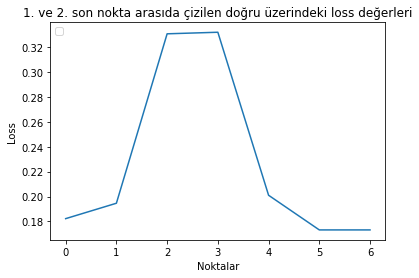

In [87]:
plt.plot(np.arange(0,7),dogruUzerindekiIlkkLoss)
plt.title('1. ve 2. son nokta arasıda çizilen doğru üzerindeki loss değerleri')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


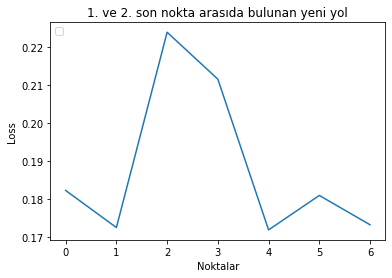

In [88]:
plt.plot(np.arange(0,7),dogruUzerindekiSonkLoss)
plt.title('1. ve 2. son nokta arasıda bulunan yeni yol')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

In [89]:
ilknoktalar12 = ilkdogrunoktalari12.copy()

for i in range(7):
    ilknoktalar12[i][0] = ilknoktalar12[i][0].flatten()
    ilknoktalar12[i][1] = ilknoktalar12[i][1].flatten()
    ilknoktalar12[i][2] = ilknoktalar12[i][2].flatten()
    ilknoktalar12[i][3] = ilknoktalar12[i][3].flatten()

Xaralist12= []
for i in range(7):
    Xaralist12.append(np.hstack((ilknoktalar12[i][0],ilknoktalar12[i][1],ilknoktalar12[i][2],ilknoktalar12[i][3])))



sonnoktalar12 = tümNoktalarim.copy()
sonnoktalarsave12 = sonnoktalar12.copy()

for i in range(7):
    sonnoktalar12[i][0] = sonnoktalar12[i][0].flatten()
    sonnoktalar12[i][1] = sonnoktalar12[i][1].flatten()
    sonnoktalar12[i][2] = sonnoktalar12[i][2].flatten()
    sonnoktalar12[i][3] = sonnoktalar12[i][3].flatten()

Xsonaralist12= []
for i in range(7):
    Xsonaralist12.append(np.hstack((sonnoktalar12[i][0],sonnoktalar12[i][1],sonnoktalar12[i][2],sonnoktalar12[i][3])))




Xaralist12 = np.array(Xaralist12)
Xsonaralist12 = np.array(Xsonaralist12)
alldizi = np.vstack((Xlist,Xaralist12,Xsonaralist12))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

2. ile 3. SON NOKTA ARASINDA 

In [90]:
w0 = load_model('eachModel2/CheckPoint-15.hdf5')
firstWeight = w0.get_weights()
w0.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)

wT = load_model('eachModel3/CheckPoint-15.hdf5')
lastWeight = wT.get_weights()
wT.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)

tümNoktalarim = []
for i in range(6):
    tümNoktalarim.append([before + (after - before) * i / 5 for before, after in zip(firstWeight, lastWeight)])
tümNoktalarim.append(lastWeight)

ilkdogrunoktalari23 = tümNoktalarim.copy()

dogruUzerindekiIlkkLoss = []
for i, weights in enumerate(tümNoktalarim):
    model.set_weights(weights)
    print(f'Interpolated weights {i}:')
    loss,accuracy=model.evaluate(testing_padded, testing_labels)
    dogruUzerindekiIlkkLoss.append(loss)

# İterasyon başlangıç
for T in range(100):
    def step(X, y,i):
        # keep track of our gradients
        with tf.GradientTape() as tape:
            # make a prediction using the model and then calculate the
            # loss
            model.set_weights(tümNoktalarim[i])
            pred = model(X)
            tensor1 = tf.convert_to_tensor(y)
            tensor2 = tf.reshape(tensor1,[5000,1])
            loss = binary_crossentropy(tensor2, pred)
        # calculate the gradients using our tape and then update the
        # model weights
        grads = tape.gradient(loss, model.trainable_variables)
        return grads


    grads = []
    for i in range(1,6,1):
        grads.append(step(training_padded,training_labels,i))


    # Tan değerlerinin hesaplanması
    tanvalue = []
    for i in range(1,6,1):
        model.set_weights(tümNoktalarim[i-1])
        dotResult1 = model.evaluate(testing_padded, testing_labels)[0]

        model.set_weights(tümNoktalarim[i+1])
        dotResult2 = model.evaluate(testing_padded, testing_labels)[0]

        print(dotResult1,dotResult2)

        if (dotResult2 > dotResult1):
            tanvalue.append((np.array(tümNoktalarim[i+1]) - np.array(tümNoktalarim[i]))/5)
        else:
            tanvalue.append((np.array(tümNoktalarim[i]) - np.array(tümNoktalarim[i-1]))/5)

    gradList = []
    for i in range(5):
        first = np.array(grads[i][0].values)
        grad1 = [first[0:5000,:],np.array(grads[i][1]),np.array(grads[i][2]),np.array(grads[i][3]),np.array(grads[i][4])]
        grad1 = np.array(grad1)
        gradList.append(grad1)

    esasGradList = gradList.copy()
    gradList = np.array(gradList)


    for i in range(5):
        gradList[i][0] = gradList[i][0].flatten()
        gradList[i][1] = gradList[i][1].flatten()
        gradList[i][2] = gradList[i][2].flatten()
        gradList[i][3] = gradList[i][3].flatten()
        gradList[i][4] = gradList[i][4].flatten()


    tanlistem = []
    for i in range(5):
        tanget = [tanvalue[i][0],tanvalue[i][1],tanvalue[i][2],tanvalue[i][3],tanvalue[i][4]]
        tanget = np.array(tanget)
        tanlistem.append(tanget)

    esasTanList = tanlistem.copy()
    tanlistem = np.array(tanlistem)

    for i in range(5):
        tanlistem[i][0] = tanlistem[i][0].flatten()
        tanlistem[i][1] = tanlistem[i][1].flatten()
        tanlistem[i][2] = tanlistem[i][2].flatten()
        tanlistem[i][3] = tanlistem[i][3].flatten()
        tanlistem[i][4] = tanlistem[i][4].flatten()

    dotsonuc = []
    for i in range(5):
        denemesonuc1 = np.dot(tanlistem[i][0],gradList[i][0])
        denemesonuc2 = np.dot(tanlistem[i][1],gradList[i][1])
        denemesonuc3 = np.dot(tanlistem[i][2],gradList[i][2])
        denemesonuc4 = np.dot(tanlistem[i][3],gradList[i][3])
        denemesonuc5 = np.dot(tanlistem[i][4],gradList[i][4])
        sonuc1 = denemesonuc1+denemesonuc2+denemesonuc3+denemesonuc4+denemesonuc5
        dotsonuc.append(sonuc1)

    learningrate = 0.0002
    güncelNoktlar = []
    for i in range(5):
        rightresult = dotsonuc[i]*esasTanList[i]
        ilkdeğer = esasGradList[i]-rightresult
        ilkgünceldeger = tümNoktalarim[i+1] - (learningrate*ilkdeğer)
        güncelNoktlar.append(ilkgünceldeger)

    # Bulunan noktaların güncellenmesi
    for i in range(5):
        tümNoktalarim[i+1] = güncelNoktlar[i]


dogruUzerindekiSonkLoss = []
for i in range(0,7,1):
    model.set_weights(tümNoktalarim[i])
    dogruResult = model.evaluate(testing_padded, testing_labels)[0]
    dogruUzerindekiSonkLoss.append(dogruResult)

157/157 - 2s - loss: 0.0453 - accuracy: 0.9886 - val_loss: 0.1804 - val_accuracy: 0.9338 - 2s/epoch - 12ms/step
157/157 - 2s - loss: 0.0486 - accuracy: 0.9872 - val_loss: 0.1730 - val_accuracy: 0.9345 - 2s/epoch - 12ms/step
Interpolated weights 0:
45/45 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9345
Interpolated weights 1:
45/45 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.8993
Interpolated weights 2:
45/45 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.5838
Interpolated weights 3:
45/45 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.5901
Interpolated weights 4:
45/45 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9225
Interpolated weights 5:
45/45 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9317
Interpolated weights 6:
45/45 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.5838

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1469029748.py:58: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



45/45 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.5901
0.2544507384300232 0.5455769896507263
45/45 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9225
0.573785662651062 0.23022323846817017
45/45 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.5901


C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1469029748.py:60: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



45/45 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9317
0.5455769896507263 0.17981009185314178
45/45 [==============================] - 0s 3ms/step - loss: 0.1798 - accuracy: 0.9317
0.23022323846817017 0.1798100471496582


C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1469029748.py:66: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1469029748.py:84: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1469029748.py:112: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the n

45/45 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.5690
0.17319518327713013 0.7069761157035828
45/45 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.5599
0.25069430470466614 0.704957902431488
45/45 [==============================] - 0s 3ms/step - loss: 0.2438 - accuracy: 0.8965
0.7069761157035828 0.24378164112567902
45/45 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9324
0.704957902431488 0.1718824952840805
45/45 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9317
0.24378164112567902 0.1798100471496582
45/45 [==============================] - 0s 2ms/step - loss: 0.7908 - accuracy: 0.5275
0.17319518327713013 0.7908186912536621
45/45 [==============================] - 0s 2ms/step - loss: 0.7260 - accuracy: 0.5261
0.21083050966262817 0.7260042428970337
45/45 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.9289
0.7908186912536621 0.2206592857837

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


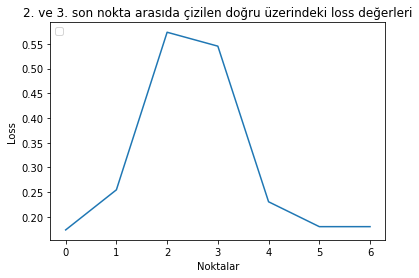

In [91]:
plt.plot(np.arange(0,7),dogruUzerindekiIlkkLoss)
plt.title('2. ve 3. son nokta arasıda çizilen doğru üzerindeki loss değerleri')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


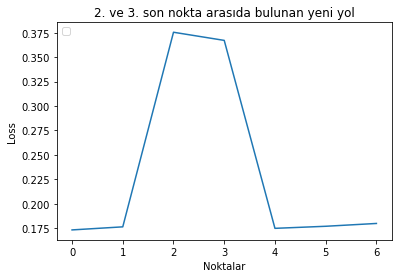

In [92]:
plt.plot(np.arange(0,7),dogruUzerindekiSonkLoss)
plt.title('2. ve 3. son nokta arasıda bulunan yeni yol')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

In [93]:
ilknoktalar23 = ilkdogrunoktalari23.copy()

for i in range(7):
    ilknoktalar23[i][0] = ilknoktalar23[i][0].flatten()
    ilknoktalar23[i][1] = ilknoktalar23[i][1].flatten()
    ilknoktalar23[i][2] = ilknoktalar23[i][2].flatten()
    ilknoktalar23[i][3] = ilknoktalar23[i][3].flatten()

Xaralist23= []
for i in range(7):
    Xaralist23.append(np.hstack((ilknoktalar23[i][0],ilknoktalar23[i][1],ilknoktalar23[i][2],ilknoktalar23[i][3])))



sonnoktalar23 = tümNoktalarim.copy()
sonnoktalarsave23 = sonnoktalar23.copy()

for i in range(7):
    sonnoktalar23[i][0] = sonnoktalar23[i][0].flatten()
    sonnoktalar23[i][1] = sonnoktalar23[i][1].flatten()
    sonnoktalar23[i][2] = sonnoktalar23[i][2].flatten()
    sonnoktalar23[i][3] = sonnoktalar23[i][3].flatten()

Xsonaralist23= []
for i in range(7):
    Xsonaralist23.append(np.hstack((sonnoktalar23[i][0],sonnoktalar23[i][1],sonnoktalar23[i][2],sonnoktalar23[i][3])))




Xaralist23 = np.array(Xaralist23)
Xsonaralist23 = np.array(Xsonaralist23)
alldizi = np.vstack((Xlist,Xaralist23,Xsonaralist23))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

3. VE 4. SON NOKTA ARASINDA

In [94]:
w0 = load_model('eachModel3/CheckPoint-15.hdf5')
firstWeight = w0.get_weights()
w0.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)

wT = load_model('eachModel4/CheckPoint-15.hdf5')
lastWeight = wT.get_weights()
wT.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)

tümNoktalarim = []
for i in range(6):
    tümNoktalarim.append([before + (after - before) * i / 5 for before, after in zip(firstWeight, lastWeight)])
tümNoktalarim.append(lastWeight)

ilkdogrunoktalari34 = tümNoktalarim.copy()

dogruUzerindekiIlkkLoss = []
for i, weights in enumerate(tümNoktalarim):
    model.set_weights(weights)
    print(f'Interpolated weights {i}:')
    loss,accuracy=model.evaluate(testing_padded, testing_labels)
    dogruUzerindekiIlkkLoss.append(loss)

# İterasyon başlangıç
for T in range(100):
    def step(X, y,i):
        # keep track of our gradients
        with tf.GradientTape() as tape:
            # make a prediction using the model and then calculate the
            # loss
            model.set_weights(tümNoktalarim[i])
            pred = model(X)
            tensor1 = tf.convert_to_tensor(y)
            tensor2 = tf.reshape(tensor1,[5000,1])
            loss = binary_crossentropy(tensor2, pred)
        # calculate the gradients using our tape and then update the
        # model weights
        grads = tape.gradient(loss, model.trainable_variables)
        return grads


    grads = []
    for i in range(1,6,1):
        grads.append(step(training_padded,training_labels,i))


    # Tan değerlerinin hesaplanması
    tanvalue = []
    for i in range(1,6,1):
        model.set_weights(tümNoktalarim[i-1])
        dotResult1 = model.evaluate(testing_padded, testing_labels)[0]

        model.set_weights(tümNoktalarim[i+1])
        dotResult2 = model.evaluate(testing_padded, testing_labels)[0]

        print(dotResult1,dotResult2)

        if (dotResult2 > dotResult1):
            tanvalue.append((np.array(tümNoktalarim[i+1]) - np.array(tümNoktalarim[i]))/5)
        else:
            tanvalue.append((np.array(tümNoktalarim[i]) - np.array(tümNoktalarim[i-1]))/5)

    gradList = []
    for i in range(5):
        first = np.array(grads[i][0].values)
        grad1 = [first[0:5000,:],np.array(grads[i][1]),np.array(grads[i][2]),np.array(grads[i][3]),np.array(grads[i][4])]
        grad1 = np.array(grad1)
        gradList.append(grad1)

    esasGradList = gradList.copy()
    gradList = np.array(gradList)


    for i in range(5):
        gradList[i][0] = gradList[i][0].flatten()
        gradList[i][1] = gradList[i][1].flatten()
        gradList[i][2] = gradList[i][2].flatten()
        gradList[i][3] = gradList[i][3].flatten()
        gradList[i][4] = gradList[i][4].flatten()


    tanlistem = []
    for i in range(5):
        tanget = [tanvalue[i][0],tanvalue[i][1],tanvalue[i][2],tanvalue[i][3],tanvalue[i][4]]
        tanget = np.array(tanget)
        tanlistem.append(tanget)

    esasTanList = tanlistem.copy()
    tanlistem = np.array(tanlistem)

    for i in range(5):
        tanlistem[i][0] = tanlistem[i][0].flatten()
        tanlistem[i][1] = tanlistem[i][1].flatten()
        tanlistem[i][2] = tanlistem[i][2].flatten()
        tanlistem[i][3] = tanlistem[i][3].flatten()
        tanlistem[i][4] = tanlistem[i][4].flatten()

    dotsonuc = []
    for i in range(5):
        denemesonuc1 = np.dot(tanlistem[i][0],gradList[i][0])
        denemesonuc2 = np.dot(tanlistem[i][1],gradList[i][1])
        denemesonuc3 = np.dot(tanlistem[i][2],gradList[i][2])
        denemesonuc4 = np.dot(tanlistem[i][3],gradList[i][3])
        denemesonuc5 = np.dot(tanlistem[i][4],gradList[i][4])
        sonuc1 = denemesonuc1+denemesonuc2+denemesonuc3+denemesonuc4+denemesonuc5
        dotsonuc.append(sonuc1)

    learningrate = 0.0002
    güncelNoktlar = []
    for i in range(5):
        rightresult = dotsonuc[i]*esasTanList[i]
        ilkdeğer = esasGradList[i]-rightresult
        ilkgünceldeger = tümNoktalarim[i+1] - (learningrate*ilkdeğer)
        güncelNoktlar.append(ilkgünceldeger)

    # Bulunan noktaların güncellenmesi
    for i in range(5):
        tümNoktalarim[i+1] = güncelNoktlar[i]


dogruUzerindekiSonkLoss = []
for i in range(0,7,1):
    model.set_weights(tümNoktalarim[i])
    dogruResult = model.evaluate(testing_padded, testing_labels)[0]
    dogruUzerindekiSonkLoss.append(dogruResult)

157/157 - 2s - loss: 0.0487 - accuracy: 0.9878 - val_loss: 0.1736 - val_accuracy: 0.9345 - 2s/epoch - 13ms/step
157/157 - 2s - loss: 0.0419 - accuracy: 0.9898 - val_loss: 0.1801 - val_accuracy: 0.9352 - 2s/epoch - 14ms/step
Interpolated weights 0:
45/45 [==============================] - 0s 3ms/step - loss: 0.1798 - accuracy: 0.9317
Interpolated weights 1:
45/45 [==============================] - 0s 3ms/step - loss: 0.2307 - accuracy: 0.9268
Interpolated weights 2:
45/45 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.6972
Interpolated weights 3:
45/45 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.9155
Interpolated weights 4:
45/45 [==============================] - 0s 3ms/step - loss: 0.2092 - accuracy: 0.9289
Interpolated weights 5:
45/45 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.9345
Interpolated weights 6:
45/45 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.6972

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\619554603.py:58: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



45/45 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.9155
0.23066949844360352 0.48302873969078064
45/45 [==============================] - 0s 3ms/step - loss: 0.2092 - accuracy: 0.9289
0.519231379032135 0.20922991633415222
38/45 [========================>.....] - ETA: 0s - loss: 0.4856 - accuracy: 0.9153

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\619554603.py:60: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



45/45 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.9345
0.48302873969078064 0.17998848855495453
45/45 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9345
0.20922991633415222 0.17998847365379333


C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\619554603.py:66: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\619554603.py:84: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\619554603.py:112: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndar

45/45 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5211
0.1798100471496582 0.6871360540390015
45/45 [==============================] - 0s 5ms/step - loss: 0.5042 - accuracy: 0.7627
0.26103174686431885 0.5042329430580139
45/45 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9282
0.6871360540390015 0.20788492262363434
45/45 [==============================] - 0s 3ms/step - loss: 0.1751 - accuracy: 0.9345
0.5042329430580139 0.1750720739364624
45/45 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.9345
0.20788492262363434 0.17998847365379333
45/45 [==============================] - 0s 3ms/step - loss: 1.5578 - accuracy: 0.5113
0.1798100471496582 1.5577579736709595
45/45 [==============================] - 0s 3ms/step - loss: 0.8009 - accuracy: 0.5113
0.27682679891586304 0.8009486198425293
45/45 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.9289
1.5577579736709595 0.207250118255

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


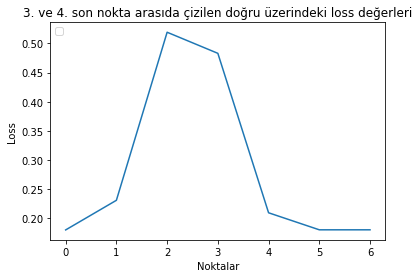

In [95]:
plt.plot(np.arange(0,7),dogruUzerindekiIlkkLoss)
plt.title('3. ve 4. son nokta arasıda çizilen doğru üzerindeki loss değerleri')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


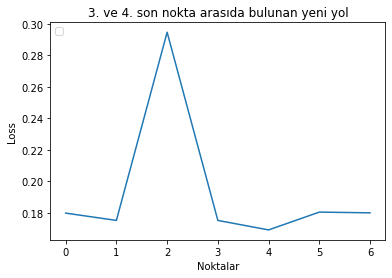

In [96]:
plt.plot(np.arange(0,7),dogruUzerindekiSonkLoss)
plt.title('3. ve 4. son nokta arasıda bulunan yeni yol')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

In [97]:
ilknoktalar34 = ilkdogrunoktalari34.copy()

for i in range(7):
    ilknoktalar34[i][0] = ilknoktalar34[i][0].flatten()
    ilknoktalar34[i][1] = ilknoktalar34[i][1].flatten()
    ilknoktalar34[i][2] = ilknoktalar34[i][2].flatten()
    ilknoktalar34[i][3] = ilknoktalar34[i][3].flatten()

Xaralist34= []
for i in range(7):
    Xaralist34.append(np.hstack((ilknoktalar34[i][0],ilknoktalar34[i][1],ilknoktalar34[i][2],ilknoktalar34[i][3])))



sonnoktalar34 = tümNoktalarim.copy()
sonnoktalarsave34 = sonnoktalar34.copy()

for i in range(7):
    sonnoktalar34[i][0] = sonnoktalar34[i][0].flatten()
    sonnoktalar34[i][1] = sonnoktalar34[i][1].flatten()
    sonnoktalar34[i][2] = sonnoktalar34[i][2].flatten()
    sonnoktalar34[i][3] = sonnoktalar34[i][3].flatten()

Xsonaralist34= []
for i in range(7):
    Xsonaralist34.append(np.hstack((sonnoktalar34[i][0],sonnoktalar34[i][1],sonnoktalar34[i][2],sonnoktalar34[i][3])))




Xaralist34 = np.array(Xaralist34)
Xsonaralist34 = np.array(Xsonaralist34)
alldizi = np.vstack((Xlist,Xaralist34,Xsonaralist34))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

4. İLE 5. SON NOKTA ARASINDA

In [98]:
w0 = load_model('eachModel4/CheckPoint-15.hdf5')
firstWeight = w0.get_weights()
w0.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)

wT = load_model('eachModel5/CheckPoint-15.hdf5')
lastWeight = wT.get_weights()
wT.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)

tümNoktalarim = []
for i in range(6):
    tümNoktalarim.append([before + (after - before) * i / 5 for before, after in zip(firstWeight, lastWeight)])
tümNoktalarim.append(lastWeight)

ilkdogrunoktalari45 = tümNoktalarim.copy()

dogruUzerindekiIlkkLoss = []
for i, weights in enumerate(tümNoktalarim):
    model.set_weights(weights)
    print(f'Interpolated weights {i}:')
    loss,accuracy=model.evaluate(testing_padded, testing_labels)
    dogruUzerindekiIlkkLoss.append(loss)

# İterasyon başlangıç
for T in range(100):
    def step(X, y,i):
        # keep track of our gradients
        with tf.GradientTape() as tape:
            # make a prediction using the model and then calculate the
            # loss
            model.set_weights(tümNoktalarim[i])
            pred = model(X)
            tensor1 = tf.convert_to_tensor(y)
            tensor2 = tf.reshape(tensor1,[5000,1])
            loss = binary_crossentropy(tensor2, pred)
        # calculate the gradients using our tape and then update the
        # model weights
        grads = tape.gradient(loss, model.trainable_variables)
        return grads


    grads = []
    for i in range(1,6,1):
        grads.append(step(training_padded,training_labels,i))


    # Tan değerlerinin hesaplanması
    tanvalue = []
    for i in range(1,6,1):
        model.set_weights(tümNoktalarim[i-1])
        dotResult1 = model.evaluate(testing_padded, testing_labels)[0]

        model.set_weights(tümNoktalarim[i+1])
        dotResult2 = model.evaluate(testing_padded, testing_labels)[0]

        print(dotResult1,dotResult2)

        if (dotResult2 > dotResult1):
            tanvalue.append((np.array(tümNoktalarim[i+1]) - np.array(tümNoktalarim[i]))/5)
        else:
            tanvalue.append((np.array(tümNoktalarim[i]) - np.array(tümNoktalarim[i-1]))/5)

    gradList = []
    for i in range(5):
        first = np.array(grads[i][0].values)
        grad1 = [first[0:5000,:],np.array(grads[i][1]),np.array(grads[i][2]),np.array(grads[i][3]),np.array(grads[i][4])]
        grad1 = np.array(grad1)
        gradList.append(grad1)

    esasGradList = gradList.copy()
    gradList = np.array(gradList)


    for i in range(5):
        gradList[i][0] = gradList[i][0].flatten()
        gradList[i][1] = gradList[i][1].flatten()
        gradList[i][2] = gradList[i][2].flatten()
        gradList[i][3] = gradList[i][3].flatten()
        gradList[i][4] = gradList[i][4].flatten()


    tanlistem = []
    for i in range(5):
        tanget = [tanvalue[i][0],tanvalue[i][1],tanvalue[i][2],tanvalue[i][3],tanvalue[i][4]]
        tanget = np.array(tanget)
        tanlistem.append(tanget)

    esasTanList = tanlistem.copy()
    tanlistem = np.array(tanlistem)

    for i in range(5):
        tanlistem[i][0] = tanlistem[i][0].flatten()
        tanlistem[i][1] = tanlistem[i][1].flatten()
        tanlistem[i][2] = tanlistem[i][2].flatten()
        tanlistem[i][3] = tanlistem[i][3].flatten()
        tanlistem[i][4] = tanlistem[i][4].flatten()

    dotsonuc = []
    for i in range(5):
        denemesonuc1 = np.dot(tanlistem[i][0],gradList[i][0])
        denemesonuc2 = np.dot(tanlistem[i][1],gradList[i][1])
        denemesonuc3 = np.dot(tanlistem[i][2],gradList[i][2])
        denemesonuc4 = np.dot(tanlistem[i][3],gradList[i][3])
        denemesonuc5 = np.dot(tanlistem[i][4],gradList[i][4])
        sonuc1 = denemesonuc1+denemesonuc2+denemesonuc3+denemesonuc4+denemesonuc5
        dotsonuc.append(sonuc1)

    learningrate = 0.0002
    güncelNoktlar = []
    for i in range(5):
        rightresult = dotsonuc[i]*esasTanList[i]
        ilkdeğer = esasGradList[i]-rightresult
        ilkgünceldeger = tümNoktalarim[i+1] - (learningrate*ilkdeğer)
        güncelNoktlar.append(ilkgünceldeger)

    # Bulunan noktaların güncellenmesi
    for i in range(5):
        tümNoktalarim[i+1] = güncelNoktlar[i]


dogruUzerindekiSonkLoss = []
for i in range(0,7,1):
    model.set_weights(tümNoktalarim[i])
    dogruResult = model.evaluate(testing_padded, testing_labels)[0]
    dogruUzerindekiSonkLoss.append(dogruResult)

157/157 - 2s - loss: 0.0422 - accuracy: 0.9888 - val_loss: 0.1768 - val_accuracy: 0.9338 - 2s/epoch - 14ms/step
157/157 - 2s - loss: 0.0521 - accuracy: 0.9850 - val_loss: 0.1770 - val_accuracy: 0.9324 - 2s/epoch - 16ms/step
Interpolated weights 0:
45/45 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.9345
Interpolated weights 1:
45/45 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9099
Interpolated weights 2:
45/45 [==============================] - 0s 4ms/step - loss: 0.4073 - accuracy: 0.7669
Interpolated weights 3:
45/45 [==============================] - 0s 3ms/step - loss: 0.3610 - accuracy: 0.8887
Interpolated weights 4:
45/45 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.9345
Interpolated weights 5:
45/45 [==============================] - 0s 3ms/step - loss: 0.1900 - accuracy: 0.9296
Interpolated weights 6:
45/45 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.7669

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1614462824.py:58: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



45/45 [==============================] - 0s 3ms/step - loss: 0.3610 - accuracy: 0.8887
0.2241157442331314 0.36104482412338257
45/45 [==============================] - 0s 4ms/step - loss: 0.2005 - accuracy: 0.9345
0.4072548747062683 0.20052671432495117
43/45 [===========================>..] - ETA: 0s - loss: 0.3627 - accuracy: 0.8881

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1614462824.py:60: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



45/45 [==============================] - 0s 3ms/step - loss: 0.1900 - accuracy: 0.9296
0.36104482412338257 0.18999923765659332
45/45 [==============================] - 0s 3ms/step - loss: 0.1900 - accuracy: 0.9296
0.20052671432495117 0.18999923765659332


C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1614462824.py:66: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1614462824.py:84: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1614462824.py:112: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the n

45/45 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.8085
0.17998847365379333 0.38698750734329224
45/45 [==============================] - 0s 3ms/step - loss: 0.3506 - accuracy: 0.8444
0.2070518434047699 0.3506269156932831
45/45 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9303
0.38698750734329224 0.19939830899238586
45/45 [==============================] - 0s 2ms/step - loss: 0.1757 - accuracy: 0.9324
0.3506269156932831 0.1757323294878006
45/45 [==============================] - 0s 3ms/step - loss: 0.1900 - accuracy: 0.9296
0.19939830899238586 0.18999923765659332
45/45 [==============================] - 0s 5ms/step - loss: 0.3677 - accuracy: 0.8268
0.17998847365379333 0.36770880222320557
45/45 [==============================] - 0s 3ms/step - loss: 0.3391 - accuracy: 0.8930
0.18962626159191132 0.33914780616760254
45/45 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9303
0.36770880222320557 0.197791

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


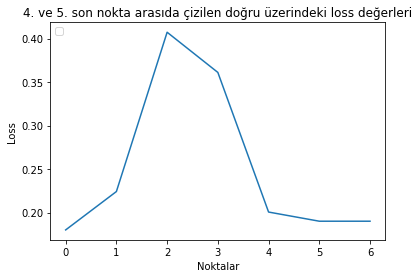

In [99]:
plt.plot(np.arange(0,7),dogruUzerindekiIlkkLoss)
plt.title('4. ve 5. son nokta arasıda çizilen doğru üzerindeki loss değerleri')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


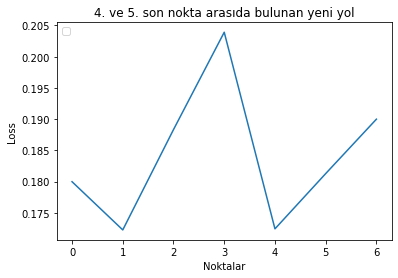

In [100]:
plt.plot(np.arange(0,7),dogruUzerindekiSonkLoss)
plt.title('4. ve 5. son nokta arasıda bulunan yeni yol')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

In [101]:
ilknoktalar45 = ilkdogrunoktalari45.copy()

for i in range(7):
    ilknoktalar45[i][0] = ilknoktalar45[i][0].flatten()
    ilknoktalar45[i][1] = ilknoktalar45[i][1].flatten()
    ilknoktalar45[i][2] = ilknoktalar45[i][2].flatten()
    ilknoktalar45[i][3] = ilknoktalar45[i][3].flatten()

Xaralist45= []
for i in range(7):
    Xaralist45.append(np.hstack((ilknoktalar45[i][0],ilknoktalar45[i][1],ilknoktalar45[i][2],ilknoktalar45[i][3])))



sonnoktalar45 = tümNoktalarim.copy()
sonnoktalarsave45 = sonnoktalar45.copy()

for i in range(7):
    sonnoktalar45[i][0] = sonnoktalar45[i][0].flatten()
    sonnoktalar45[i][1] = sonnoktalar45[i][1].flatten()
    sonnoktalar45[i][2] = sonnoktalar45[i][2].flatten()
    sonnoktalar45[i][3] = sonnoktalar45[i][3].flatten()

Xsonaralist45= []
for i in range(7):
    Xsonaralist45.append(np.hstack((sonnoktalar45[i][0],sonnoktalar45[i][1],sonnoktalar45[i][2],sonnoktalar45[i][3])))




Xaralist45 = np.array(Xaralist45)
Xsonaralist45 = np.array(Xsonaralist45)
alldizi = np.vstack((Xlist,Xaralist45,Xsonaralist45))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

5. İLE 1. SON NOKTA ARASINDA

In [102]:
w0 = load_model('eachModel5/CheckPoint-15.hdf5')
firstWeight = w0.get_weights()
w0.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)

wT = load_model('eachModel1/CheckPoint-15.hdf5')
lastWeight = wT.get_weights()
wT.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)

tümNoktalarim = []
for i in range(6):
    tümNoktalarim.append([before + (after - before) * i / 5 for before, after in zip(firstWeight, lastWeight)])
tümNoktalarim.append(lastWeight)

ilkdogrunoktalari51 = tümNoktalarim.copy()

dogruUzerindekiIlkkLoss = []
for i, weights in enumerate(tümNoktalarim):
    model.set_weights(weights)
    print(f'Interpolated weights {i}:')
    loss,accuracy=model.evaluate(testing_padded, testing_labels)
    dogruUzerindekiIlkkLoss.append(loss)

# İterasyon başlangıç
for T in range(100):
    def step(X, y,i):
        # keep track of our gradients
        with tf.GradientTape() as tape:
            # make a prediction using the model and then calculate the
            # loss
            model.set_weights(tümNoktalarim[i])
            pred = model(X)
            tensor1 = tf.convert_to_tensor(y)
            tensor2 = tf.reshape(tensor1,[5000,1])
            loss = binary_crossentropy(tensor2, pred)
        # calculate the gradients using our tape and then update the
        # model weights
        grads = tape.gradient(loss, model.trainable_variables)
        return grads


    grads = []
    for i in range(1,6,1):
        grads.append(step(training_padded,training_labels,i))


    # Tan değerlerinin hesaplanması
    tanvalue = []
    for i in range(1,6,1):
        model.set_weights(tümNoktalarim[i-1])
        dotResult1 = model.evaluate(testing_padded, testing_labels)[0]

        model.set_weights(tümNoktalarim[i+1])
        dotResult2 = model.evaluate(testing_padded, testing_labels)[0]

        print(dotResult1,dotResult2)

        if (dotResult2 > dotResult1):
            tanvalue.append((np.array(tümNoktalarim[i+1]) - np.array(tümNoktalarim[i]))/5)
        else:
            tanvalue.append((np.array(tümNoktalarim[i]) - np.array(tümNoktalarim[i-1]))/5)

    gradList = []
    for i in range(5):
        first = np.array(grads[i][0].values)
        grad1 = [first[0:5000,:],np.array(grads[i][1]),np.array(grads[i][2]),np.array(grads[i][3]),np.array(grads[i][4])]
        grad1 = np.array(grad1)
        gradList.append(grad1)

    esasGradList = gradList.copy()
    gradList = np.array(gradList)


    for i in range(5):
        gradList[i][0] = gradList[i][0].flatten()
        gradList[i][1] = gradList[i][1].flatten()
        gradList[i][2] = gradList[i][2].flatten()
        gradList[i][3] = gradList[i][3].flatten()
        gradList[i][4] = gradList[i][4].flatten()


    tanlistem = []
    for i in range(5):
        tanget = [tanvalue[i][0],tanvalue[i][1],tanvalue[i][2],tanvalue[i][3],tanvalue[i][4]]
        tanget = np.array(tanget)
        tanlistem.append(tanget)

    esasTanList = tanlistem.copy()
    tanlistem = np.array(tanlistem)

    for i in range(5):
        tanlistem[i][0] = tanlistem[i][0].flatten()
        tanlistem[i][1] = tanlistem[i][1].flatten()
        tanlistem[i][2] = tanlistem[i][2].flatten()
        tanlistem[i][3] = tanlistem[i][3].flatten()
        tanlistem[i][4] = tanlistem[i][4].flatten()

    dotsonuc = []
    for i in range(5):
        denemesonuc1 = np.dot(tanlistem[i][0],gradList[i][0])
        denemesonuc2 = np.dot(tanlistem[i][1],gradList[i][1])
        denemesonuc3 = np.dot(tanlistem[i][2],gradList[i][2])
        denemesonuc4 = np.dot(tanlistem[i][3],gradList[i][3])
        denemesonuc5 = np.dot(tanlistem[i][4],gradList[i][4])
        sonuc1 = denemesonuc1+denemesonuc2+denemesonuc3+denemesonuc4+denemesonuc5
        dotsonuc.append(sonuc1)

    learningrate = 0.0002
    güncelNoktlar = []
    for i in range(5):
        rightresult = dotsonuc[i]*esasTanList[i]
        ilkdeğer = esasGradList[i]-rightresult
        ilkgünceldeger = tümNoktalarim[i+1] - (learningrate*ilkdeğer)
        güncelNoktlar.append(ilkgünceldeger)

    # Bulunan noktaların güncellenmesi
    for i in range(5):
        tümNoktalarim[i+1] = güncelNoktlar[i]


dogruUzerindekiSonkLoss = []
for i in range(0,7,1):
    model.set_weights(tümNoktalarim[i])
    dogruResult = model.evaluate(testing_padded, testing_labels)[0]
    dogruUzerindekiSonkLoss.append(dogruResult)

157/157 - 3s - loss: 0.0516 - accuracy: 0.9866 - val_loss: 0.1776 - val_accuracy: 0.9338 - 3s/epoch - 22ms/step
157/157 - 4s - loss: 0.0509 - accuracy: 0.9860 - val_loss: 0.1795 - val_accuracy: 0.9338 - 4s/epoch - 26ms/step
Interpolated weights 0:
45/45 [==============================] - 0s 3ms/step - loss: 0.1900 - accuracy: 0.9296
Interpolated weights 1:
45/45 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.9211
Interpolated weights 2:
45/45 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.9063
Interpolated weights 3:
45/45 [==============================] - 0s 4ms/step - loss: 0.2602 - accuracy: 0.8986
Interpolated weights 4:
45/45 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9120
Interpolated weights 5:
45/45 [==============================] - 0s 4ms/step - loss: 0.1822 - accuracy: 0.9317
Interpolated weights 6:
45/45 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.9063

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\3656361305.py:58: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



45/45 [==============================] - 0s 4ms/step - loss: 0.2602 - accuracy: 0.8986
0.19491727650165558 0.2602170705795288
45/45 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9120
0.24773357808589935 0.20900648832321167
45/45 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.8986


C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\3656361305.py:60: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



45/45 [==============================] - 0s 3ms/step - loss: 0.1822 - accuracy: 0.9317
0.2602170705795288 0.18224728107452393
45/45 [==============================] - 0s 3ms/step - loss: 0.1822 - accuracy: 0.9317
0.20900648832321167 0.18224728107452393


C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\3656361305.py:66: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\3656361305.py:84: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\3656361305.py:112: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the n

45/45 [==============================] - 0s 5ms/step - loss: 0.2286 - accuracy: 0.9317
0.18999923765659332 0.22856669127941132
45/45 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.9296
0.18224549293518066 0.23514236509799957
45/45 [==============================] - 0s 3ms/step - loss: 0.1804 - accuracy: 0.9296
0.22856669127941132 0.18044407665729523
45/45 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9338
0.23514236509799957 0.17456962168216705
45/45 [==============================] - 0s 3ms/step - loss: 0.1822 - accuracy: 0.9317
0.18044407665729523 0.18224728107452393
45/45 [==============================] - 0s 3ms/step - loss: 0.2363 - accuracy: 0.9077
0.18999923765659332 0.23626479506492615
45/45 [==============================] - 0s 3ms/step - loss: 0.2498 - accuracy: 0.8993
0.18425802886486053 0.249751478433609
45/45 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9296
0.23626479506492615 0.1846

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


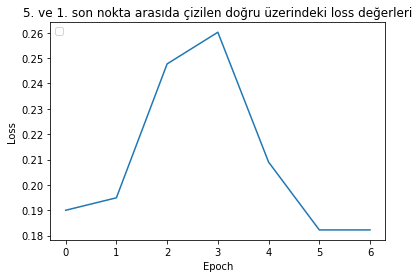

In [103]:
plt.plot(np.arange(0,7),dogruUzerindekiIlkkLoss)
plt.title('5. ve 1. son nokta arasıda çizilen doğru üzerindeki loss değerleri')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


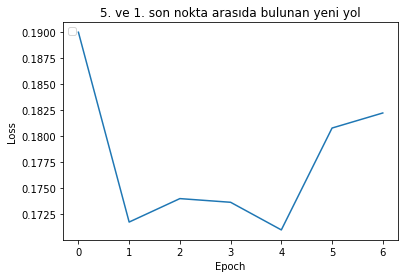

In [104]:
plt.plot(np.arange(0,7),dogruUzerindekiSonkLoss)
plt.title('5. ve 1. son nokta arasıda bulunan yeni yol')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [105]:
ilknoktalar51 = ilkdogrunoktalari51.copy()

for i in range(7):
    ilknoktalar51[i][0] = ilknoktalar51[i][0].flatten()
    ilknoktalar51[i][1] = ilknoktalar51[i][1].flatten()
    ilknoktalar51[i][2] = ilknoktalar51[i][2].flatten()
    ilknoktalar51[i][3] = ilknoktalar51[i][3].flatten()

Xaralist51= []
for i in range(7):
    Xaralist51.append(np.hstack((ilknoktalar51[i][0],ilknoktalar51[i][1],ilknoktalar51[i][2],ilknoktalar51[i][3])))



sonnoktalar51 = tümNoktalarim.copy()
sonnoktalarsave51 = sonnoktalar51.copy()

for i in range(7):
    sonnoktalar51[i][0] = sonnoktalar51[i][0].flatten()
    sonnoktalar51[i][1] = sonnoktalar51[i][1].flatten()
    sonnoktalar51[i][2] = sonnoktalar51[i][2].flatten()
    sonnoktalar51[i][3] = sonnoktalar51[i][3].flatten()

Xsonaralist51= []
for i in range(7):
    Xsonaralist51.append(np.hstack((sonnoktalar51[i][0],sonnoktalar51[i][1],sonnoktalar51[i][2],sonnoktalar51[i][3])))




Xaralist51 = np.array(Xaralist51)
Xsonaralist51 = np.array(Xsonaralist51)
alldizi = np.vstack((Xlist,Xaralist51,Xsonaralist51))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

TÜM SON NOKTLARIN BİRLEŞTİRİLMİŞ GÖRÜNTÜSÜ

In [106]:
# TODO:
alldizi = np.vstack((Xlist,Xsonaralist12,Xsonaralist23,Xsonaralist34,Xsonaralist45,Xsonaralist51))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [107]:
# from pyml_ensemble import Ensemble
# from pyml_ensemble.aggregator import MeanAggregator

SON NOKTALAR İLE OLUŞTURULAN ENSEMBLE

In [108]:
# w0.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)

# ensemble = Ensemble()
# aggregator = MeanAggregator()
# ensemble.set_aggregator(aggregator)

models = []
for i in range(1,6,1):
    w0 = load_model('eachModel{}/CheckPoint-15.hdf5'.format(i))
    models.append(w0)

preds = [model.predict(testing_padded) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

ensemble_accuracy = accuracy_score(testing_labels, ensemble_prediction)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

45/45 [==============================] - 0s 4ms/step
Accuracy Score for average ensemble =  0.4887323943661972


ARA NOKTALAR İLE OLUŞTURULAN ENSEMBLE

In [ ]:
models = []
allEndPoint = [sonnoktalar12,sonnoktalar23,sonnoktalar34,sonnoktalar45,sonnoktalar51]

In [58]:
allEndPoint = np.array(allEndPoint)
allEndPoint[0][1].shape

(5,)

In [111]:
allEndPoint = [sonnoktalarsave12,sonnoktalarsave23,sonnoktalarsave34,sonnoktalarsave45,sonnoktalarsave51]

In [112]:
allEndPoint = np.array(allEndPoint)

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1247497810.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [117]:
deneme = tümNoktalarim.copy()
deneme = np.array(deneme) 
deneme.shape

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1044498333.py:2: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



(7, 5)

In [120]:
w0 = load_model('eachModel5/CheckPoint-15.hdf5')
firstWeight = w0.get_weights()
firstWeight = np.array(firstWeight)

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\707703372.py:3: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [129]:
print("\n",firstWeight[0].shape)
print("\n",firstWeight[1].shape)
print("\n",firstWeight[2].shape)
print("\n",firstWeight[3].shape)
print("\n",firstWeight[4].shape)


 (5000, 8)

 (8, 24)

 (24,)

 (24, 1)

 (1,)


In [138]:
allEndPoint = [sonnoktalarsave12,sonnoktalarsave23,sonnoktalarsave34,sonnoktalarsave45,sonnoktalarsave51]
allEndPoint = np.array(allEndPoint)
allEndPoint[0][0][0].shape

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\1379022068.py:2: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



(40000,)

In [157]:
models = []
allEndPoint = [sonnoktalarsave12,sonnoktalarsave23,sonnoktalarsave34,sonnoktalarsave45,sonnoktalarsave51]
allEndPoint = np.array(allEndPoint)

for i in range(5):
    for j in range(5):
        allEndPoint[i][j][0] = np.reshape(np.array(allEndPoint[i][j][0]),(5000,8))
        allEndPoint[i][j][1] = np.reshape(np.array(allEndPoint[i][j][1]),(8,24))
        allEndPoint[i][j][2] = np.reshape(np.array(allEndPoint[i][j][2]),(24,))
        allEndPoint[i][j][3] = np.reshape(np.array(allEndPoint[i][j][3]),(24,1))
        allEndPoint[i][j][4] = np.reshape(np.array(allEndPoint[i][j][4]),(1,))

C:\Users\enes_\AppData\Local\Temp\ipykernel_15636\3056514451.py:3: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [158]:
# print(allEndPoint[0][0][0].shape)
# tf.convert_to_tensor(y)
for i in range(5):
    for j in range(1,6,1):
        w0 = load_model('eachModel5/CheckPoint-15.hdf5')
        w0.set_weights(tf.convert_to_tensor(list(allEndPoint[i][j])))
        models.append(w0)

preds = [model.predict(testing_padded) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

ensemble_accuracy = accuracy_score(testing_labels, ensemble_prediction)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [92]:
ensemble_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
testing_labels

array([0, 1, 1, ..., 0, 0, 1])

In [75]:
testing_padded.shape

()

İKİ NOKTA ARASINDAKİ YOLLAR

In [30]:
ilknoktalar = ilkdogrunoktalari12.copy()

for i in range(7):
    ilknoktalar[i][0] = ilknoktalar[i][0].flatten()
    ilknoktalar[i][1] = ilknoktalar[i][1].flatten()
    ilknoktalar[i][2] = ilknoktalar[i][2].flatten()
    ilknoktalar[i][3] = ilknoktalar[i][3].flatten()

Xaralist= []
for i in range(7):
    Xaralist.append(np.hstack((ilknoktalar[i][0],ilknoktalar[i][1],ilknoktalar[i][2],ilknoktalar[i][3])))



sonnoktalar = tümNoktalarim.copy()

for i in range(7):
    sonnoktalar[i][0] = sonnoktalar[i][0].flatten()
    sonnoktalar[i][1] = sonnoktalar[i][1].flatten()
    sonnoktalar[i][2] = sonnoktalar[i][2].flatten()
    sonnoktalar[i][3] = sonnoktalar[i][3].flatten()

Xsonaralist= []
for i in range(7):
    Xsonaralist.append(np.hstack((sonnoktalar[i][0],sonnoktalar[i][1],sonnoktalar[i][2],sonnoktalar[i][3])))




Xaralist = np.array(Xaralist)
Xsonaralist = np.array(Xsonaralist)
alldizi = np.vstack((Xlist,Xaralist,Xsonaralist))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

İki son nokta arasındaki noktalar yeni yaklaşım
Bunu denemek için sonraya bırakıyorum.

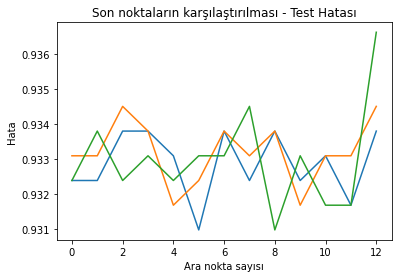

In [74]:
plt.plot(range(13),testResultLastModels[0:13])
plt.plot(range(13),testResultLastModels[13:26])
plt.plot(range(13),testResultLastModels[26:39])
plt.xlabel("Ara nokta sayısı")
plt.ylabel("Hata")
plt.title("Son noktaların karşılaştırılması - Test Hatası")
plt.show()